# van der Pol Oscillator

This notebook solves the van der Pol equations for a nonlinear oscillator.  The solutions of this oscillator
can have deterministic chaos.  This is demonstrated below by plotting the limit cyle of the oscillator.

The equation of motion for this oscillator is
$$
\ddot x - \mu(1-x^2)\dot x + x = 0.
$$
The oscillator is solved numerically by writing it as a first order system
\begin{align}
\dot x &= y\\
\dot y &= \mu(1-x^2)y - x,
\end{align}
using the new variable $y\equiv \dot x$.

The equations are solved numerically using the `DifferentialEquations.jl` package.

In [1]:
using DifferentialEquations
using Plots
using Random

#### Define a function to evaluate the RHS of the ODEs

The equations are solved with the solution vector
$$u = \pmatrix{x\\y}$$

In [2]:
function deqs!(du, u, p, t)
    mu = p[1]
    du[1] = u[2]
    du[2] = mu*(1.0-u[1]*u[1])*u[2] - u[1]
end

deqs! (generic function with 1 method)

#### Parameters and Initial Data
The only parameter is the value of $\mu$.  This is saved in the array `p0`.

The initial values
$$u_0 = \pmatrix{x_0\\y_0}$$
are stored in the vector `u0 = [x0,y0]`

In [3]:
p0 = [5.0]
u0 = [2.0, 0.0]

2-element Vector{Float64}:
 2.0
 0.0

In [4]:
tspan=(0.0, 1000.0)
prob = ODEProblem(deqs!, u0, tspan, p0)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 1000.0)
u0: 2-element Vector{Float64}:
 2.0
 0.0

In [5]:
#alg = ABM54()
#alg = Vern9()
#alg = Euler()
#alg = Tsit5()
#alg = VCABM()
#alg = lsoda()
alg = RK4()
#alg = Midpoint()
#alg = Vern7()
#alg = Rosenbrock32()
adapt = false
outdx = 0.01

0.01

#### Find the solution and plot it

In [6]:
sol = solve(prob, alg, reltol=1.0e-12, abstol=1.0e-12, adaptive=adapt, saveat=outdx, dt=0.002);

In [7]:
tt = sol.t
s1 = sol[1,:]
s2 = sol[2,:];

In [8]:
plot(tt,s1,
    lw=2,
    grid = :off,
    xtickfont=font(12),
    ytickfont=font(12),
    guidefont=font(12),
    linecolor=:blue,
    legend="x",
    xlims=(0.0,50.0)
    )
plot!(tt,s2,label="y",linecolor=:green,lw=2)

LoadError: MethodError: no method matching convertLegendValue(::String)
[0mClosest candidates are:
[0m  convertLegendValue([91m::Tuple{S, T}[39m) where {S<:Real, T<:Real} at ~/.julia/packages/Plots/lW9ll/src/args.jl:1715
[0m  convertLegendValue([91m::Tuple{Real, Symbol}[39m) at ~/.julia/packages/Plots/lW9ll/src/args.jl:1716
[0m  convertLegendValue([91m::Union{Tuple, NamedTuple}[39m) at ~/.julia/packages/Plots/lW9ll/src/args.jl:1714
[0m  ...

### Demonstrate Convergence

The convergence of numerical algorithms can be demonstated from discrete solutions computed with different
time steps $h$.  Using a non-adaptive ODE solver is essential.  Here the solution is calculated at six different
values of $h$.  The solution calculated using RK4 is accurate to $O(h^4)$.

The discrete solution $\hat u_h$ calculated with discrete scale $h$ can be written
$$
\hat u_h(t) = u_{{\rm exact(t)}} + h^4\epsilon(t)
$$
where $u_{{\rm exact(t)}}$ is the exact solution of the ODEs and $\epsilon(t)$ is a resolution-independent 
error function.  If we take the difference of two discrete solutions,
$$
\hat u_{2h}(t) - \hat u_h(t) = ((2h)^4 - h^4)\epsilon(t) = 15h^4\epsilon(t).
$$
In principle, $\epsilon(t)$ is not known, or then we would know the exact solution.  However, the
difference of $\hat u_{2h}(t) - \hat u_h(t)$ is of order $O(h^4)$.

To verify that the numerical algorithm is coded correctly, and that it is properly used,
we can show that the numerical solutions converge with the expected order $O(h^4)$.

In [9]:
adapt = false
tol = 1.0e-8
dt32 = 0.1
dt16 = dt32/2.0
dt8 = dt16/2.0
dt4 = dt8/2.0
dt2 = dt4/2.0
dt1 = dt2/2.0
sol32 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt32);
sol16 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt16);
sol8 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt8);
sol4 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt4);
sol2 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt2);
sol1 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt1);

In [10]:
s32 = sol32[1,:]
s16 = sol16[1,:]
s8 = sol8[1,:]
s4 = sol4[1,:]
s2 = sol2[1,:]
s1 = sol1[1,:]
d1 = similar(s1)
d2 = similar(s2)
d4 = similar(s4)
d8 = similar(s8)
d16 = similar(s16)
epsilon = 1.0e-17
@. d1 = abs(s1 - s2) + epsilon
@. d2 = abs(s2 - s4) + epsilon
@. d4 = abs(s4 - s8) + epsilon
@. d8 = abs(s8 - s16) + epsilon
@. d16 = abs(s16 - s32) + epsilon;
tt = sol1.t;

#### Plotting the differences, we see the error scale as $O(h^4)$.

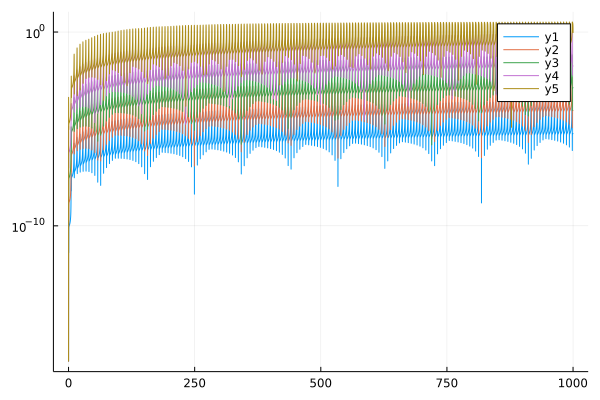

In [11]:
plot(tt, d1)
plot!(tt, d2)
plot!(tt, d4)
plot!(tt, d8)
plot!(tt, d16,yaxis=:log)

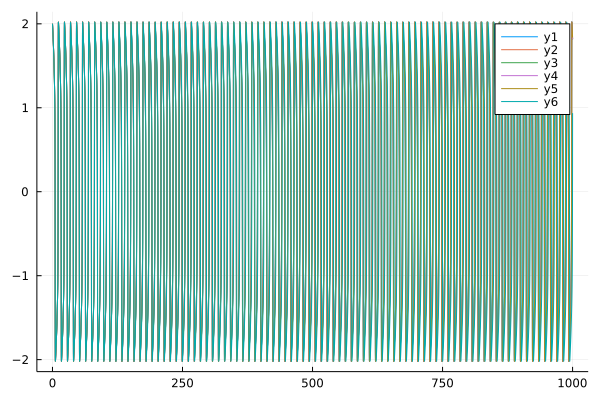

In [12]:
plot(tt,[s1,s2,s4,s8,s16,s32])

In [13]:
t32 = sol32[2,:]
t16 = sol16[2,:]
t8 = sol8[2,:]
t4 = sol4[2,:]
t2 = sol2[2,:]
t1 = sol1[2,:];

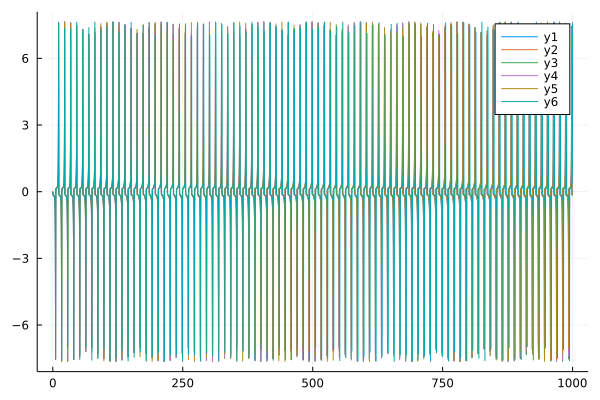

In [14]:
plot(tt,[t1,t2,t4,t8,t16,t32])

### The Limit Cycle

The van der Pol oscillator is chaotic with an attractor.  If we begin the oscillator with a different
random initial conditions, the solution is acctracted to a single trajectory in phase space. 
To demonstrate this, we generate `N` random sets of initial data.  We solve the ODE for each solution
as a function of fixed time.  We then plot the solution of all `N` solutions in phase space for
each time.

Now we use a high-precision ODE solver, the `Vern7()` method with adaptive step sizes.  We output the
solutions at fixed time step `outdt`.

In [15]:
N = 100
rng = MersenneTwister(1234);
id = 3*randn(rng, Float64, (N, 2));

In [16]:
data = []
tspan=(0.0, 10.0)
adapt = true
outdt = 0.05
alg = Vern7()

for i = 1:N
    u0 = [id[i,1], id[i,2]]
    prob = ODEProblem(deqs!, u0, tspan, p0)
    sol = solve(prob, alg, reltol=1.0e-12, abstol=1.0e-12, adaptive=adapt, saveat=outdt);
    push!(data,sol)
end
    

In [17]:
a = Animation()
limx = 10.0
xrange = (-limx,limx)
yrange = (-limx,limx)
nt = length(data[1].t)
ntail = 10
for i = 1:nt
    plt = plot(1, xlim=xrange, ylim=yrange, xlabel="x", ylabel="dx/dt", color = :blue, label="")
    bi = max(1,i-ntail)
    ei = i
    for j = 1:N
        inds = bi:ei
        plt = plot!(data[j][1,inds], data[j][2,inds], xlim=xrange, ylim=yrange, color = :blue, label="")
        plt = plot!([data[j][1,i]], [data[j][2,i]], xlim=xrange, ylim=yrange, color = :red, marker = 4, seriestype = :scatter, label="")
    end
    frame(a, plt)
end

┌ Info: Saved animation to 
│   fn = /Users/dwn8/.julia/dev/numex/examples/vdp_limit_cycle.gif
└ @ Plots /Users/dwn8/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/Users/dwn8/.julia/dev/numex/examples/vdp_limit_cycle.gif")
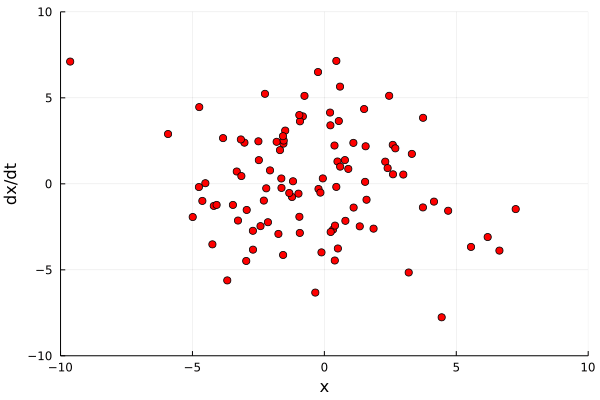

In [18]:
gif(a, "vdp_limit_cycle.gif")

In [19]:
mp4(a, "vdp_limit_cycle.mp4")

┌ Info: Saved animation to 
│   fn = /Users/dwn8/.julia/dev/numex/examples/vdp_limit_cycle.mp4
└ @ Plots /Users/dwn8/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/Users/dwn8/.julia/dev/numex/examples/vdp_limit_cycle.mp4")